#<font color='#3dc1d3'>  NLP to summarize the Protocol Document and ML to predict the trial's completion
#Outline
---
# <font color='#3dc1d3'>  
#<font color='#3dc1d3'>  Section 1:
1.1. Exploratory Data Analysis

1.2. Data Preparation
#<font color='#3dc1d3'>  Section 2:
2.1. Information Extraction

2.2. Text Summarization using longformer
#<font color='#3dc1d3'>  Section 3:
3.1 Modelling

3.2 Results <br>


# Section 1


##<font color='#3dc1d3'> 1.1 EXPLORATORY DATA ANALYSIS

#Outline
---
# <font color='#3dc1d3'>  
1. Importing necessary libraries
2. Regarding the Dataset
3. Studying the top 10 conditions in depth
5. Top 10 disease <br>

###1. Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Regarding the Dataset

*   The data below reflects each disease's total number of unique documents.
*   Detailed EDA performed to understand the dataset regarding the protocol document.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Practicum Final/2. Exploratory Data Analysis/Code/count_protocol_conditions.csv')
df.head(5)


,totalcount,document_type,name
0,205,Study Protocol and Statistical Analysis Plan,Breast Cancer
1,177,Study Protocol and Statistical Analysis Plan,Obesity
2,144,Study Protocol and Statistical Analysis Plan,Depression
3,136,Study Protocol and Statistical Analysis Plan,Prostate Cancer
4,116,Study Protocol,Asthma


In [ ]:
df.shape

(17069, 3)

In [ ]:
df.isnull().sum()

totalcount       0
document_type    0
name             0
dtype: int64

In [ ]:
df['document_type'].unique()

array(['Study Protocol and Statistical Analysis Plan', 'Study Protocol',
       'Study Protocol, Statistical Analysis Plan, and Informed Consent Form',
       'Study Protocol: Original', 'Study Protocol: Amendment 1',
       'Study Protocol: Amendment 2',
       'Study Protocol and Informed Consent Form',
       'Study Protocol: Version 5', 'Study Protocol: Protocol',
       'Study Protocol: Protocol Cover Page', 'Study Protocol: Version 6',
       'Study Protocol: Amendment 3', 'Study Protocol: Amendment 4',
       'Study Protocol: Amendment 5', 'Study Protocol: Amendment 6',
       'Study Protocol: Version 4',
       'Study Protocol: and Statistical Analysis Plan',
       'Study Protocol and Statistical Analysis Plan: 9. Statistical Considerations',
       'Study Protocol and Statistical Analysis Plan: Addendum Study Protocol for COVID-19',
       'Study Protocol and Statistical Analysis Plan: Amended Protocol V7 approved by Ethics Board on Oct 9, 2018',
       'Study Protocol and St

In [ ]:
df['document_type'].nunique()

363

In [ ]:
df['document_type_new'] = df['document_type'].str.split(':').str[0]

In [ ]:
df['document_type_new']

0        Study Protocol and Statistical Analysis Plan
1        Study Protocol and Statistical Analysis Plan
2        Study Protocol and Statistical Analysis Plan
3        Study Protocol and Statistical Analysis Plan
4                                      Study Protocol
                             ...                     
17064    Study Protocol and Statistical Analysis Plan
17065    Study Protocol and Statistical Analysis Plan
17066    Study Protocol and Statistical Analysis Plan
17067    Study Protocol and Statistical Analysis Plan
17068    Study Protocol and Statistical Analysis Plan
Name: document_type_new, Length: 17069, dtype: object

In [ ]:
df['document_type_new'].unique()

array(['Study Protocol and Statistical Analysis Plan', 'Study Protocol',
       'Study Protocol, Statistical Analysis Plan, and Informed Consent Form',
       'Study Protocol and Informed Consent Form',
       'Informed Consent Form'], dtype=object)

* 5 unique types of document

In [ ]:
df['document_type_new'].nunique()

5

In [ ]:
df

In [ ]:
df['name'].nunique()

13210

In [ ]:
df['nameupper'] = df['name'].str.upper()

* Number of unique disease

In [ ]:
df['nameupper'].nunique()

13076

In [ ]:
df['namelower'] = df['name'].str.lower()

In [ ]:
df

###Studying the top 10 conditions in depth

#### Lymphoma

In [ ]:
lymphoma = df[df['namelower'].str.contains('lymphoma')]
lymphoma_df = pd.DataFrame(lymphoma, columns = ['totalcount', 'namelower','document_type'])

In [ ]:
Total = lymphoma_df['totalcount'].sum()
print (Total)

1112


In [ ]:
lymphoma_df.shape

(544, 3)

####Cancer

In [ ]:
cancer = df[df['namelower'].str.contains('cancer')]
cancer_df = pd.DataFrame(cancer, columns = ['totalcount', 'namelower','document_type'])

In [ ]:
Total = cancer_df['totalcount'].sum()
print (Total)

3038


In [ ]:
cancer_df.shape

(1043, 3)

####Pain

In [ ]:
pain = df[df['namelower'].str.contains('pain')]
pain_df = pd.DataFrame(pain, columns = ['totalcount', 'namelower','document_type'])

In [ ]:
Total = pain_df['totalcount'].sum()
print (Total)

947


In [ ]:
pain_df.shape

(262, 3)

####Diabetes

In [ ]:
diabetes = df[df['namelower'].str.contains('diabetes')]

diabetes_df = pd.DataFrame(diabetes, columns = ['totalcount', 'namelower','document_type'])

In [ ]:
Total = diabetes_df['totalcount'].sum()
print (Total)

In [ ]:
diabetes_df.shape

(129, 3)

####Arthritis

In [ ]:
arthritis = df[df['namelower'].str.contains('arthritis')]
arthritis_df = pd.DataFrame(arthritis, columns = ['totalcount', 'namelower','document_type'])

In [ ]:
Total = arthritis_df['totalcount'].sum()
print (Total)

516


In [ ]:
arthritis_df.shape

(123, 3)

####HIV

In [ ]:
hiv = df[df['namelower'].str.contains('hiv')]
hiv_df = pd.DataFrame(hiv, columns = ['totalcount', 'namelower','document_type'])

In [ ]:
Total = hiv_df['totalcount'].sum()
print (Total)

431


In [ ]:
hiv_df.shape

(94, 3)

####Obesity

In [ ]:
obesity = df[df['namelower'].str.contains('obesity')]
obesity_df = pd.DataFrame(obesity, columns = ['totalcount', 'namelower','document_type'])

In [ ]:
Total = obesity_df['totalcount'].sum()
print (Total)

373


In [ ]:
obesity_df.shape

(56, 3)

####Depression

In [ ]:
depression = df[df['namelower'].str.contains('depression')]

depression_df = pd.DataFrame(depression, columns = ['totalcount', 'namelower','document_type'])

In [ ]:
Total = depression_df['totalcount'].sum()
print (Total)

306


In [ ]:
depression_df.shape

(68, 3)

####Myeloma

In [ ]:
myeloma = df[df['namelower'].str.contains('myeloma')]

myeloma_df = pd.DataFrame(myeloma, columns = ['totalcount', 'namelower','document_type'])

In [ ]:
Total = myeloma_df['totalcount'].sum()
print (Total)

287


In [ ]:
myeloma_df.shape

(70, 3)

####Stroke

In [ ]:
stroke = df[df['namelower'].str.contains('stroke')]
stroke_df = pd.DataFrame(stroke, columns = ['totalcount', 'namelower','document_type'])

In [ ]:
Total = stroke_df['totalcount'].sum()
print (Total)

281


In [ ]:
stroke_df.shape

(52, 3)

In [ ]:
frames= [stroke_df, myeloma_df, depression_df, obesity_df, hiv_df, arthritis_df, diabetes_df, pain_df, cancer_df, lymphoma_df]  
result= pd.concat(frames)
display(result)

,totalcount,namelower,document_type
7,106,stroke,Study Protocol and Statistical Analysis Plan
38,58,stroke,Study Protocol
288,14,ischemic stroke,Study Protocol and Statistical Analysis Plan
346,13,ischemic stroke,Study Protocol
446,10,"stroke, acute",Study Protocol and Statistical Analysis Plan
...,...,...,...
17064,1,ann arbor stage iv childhood non-hodgkin lymphoma,Study Protocol and Statistical Analysis Plan
17065,1,ann arbor stage iv diffuse large b-cell lymphoma,Study Protocol and Statistical Analysis Plan
17066,1,ann arbor stage iv grade 3 follicular lymphoma,Study Protocol and Statistical Analysis Plan
17067,1,ann arbor stage iv indolent adult non-hodgkin ...,Study Protocol and Statistical Analysis Plan


In [ ]:
disease = [['lymphoma', 1112],['cancer', 3038],['pain', 947],['diabetes', 920],['arthritis', 516],['hiv', 431],['obesity', 373],['depression', 306],['myeloma', 287],['stroke', 281]]


In [ ]:
df_combine = pd.DataFrame(disease, columns=['Name', 'Count'])

###Top 10 disease

In [ ]:
df_combine.sort_values(["Count"], ascending=False)

,Name,Count
1,cancer,3038
0,lymphoma,1112
2,pain,947
3,diabetes,920
4,arthritis,516
5,hiv,431
6,obesity,373
7,depression,306
8,myeloma,287
9,stroke,281


In [ ]:
disease = [['lymphoma', 1112],['cancer', 3038],['pain', 947],['diabetes', 920],['arthritis', 516],['hiv', 431],['obesity', 373],['depression', 306],['myeloma', 287],['stroke', 281]]
dis = ['lymphoma','cancer','pain','diabetes','arthritis','hiv','obesity','depression', 'myeloma','stroke']
count =  [ 1112, 3038, 947, 920, 516, 431, 373, 306, 287, 281]



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

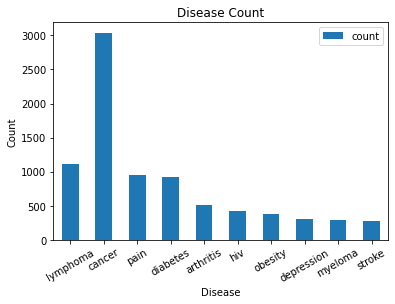

In [ ]:
df = pd.DataFrame({'condition':['lymphoma','cancer','pain','diabetes','arthritis','hiv','obesity','depression', 'myeloma','stroke'], 'count':[ 1112, 3038, 947, 920, 516, 431, 373, 306, 287, 281]})
ax = df.plot.bar(x='condition', y='count', rot=0)
plt.title('Disease Count') 
plt.xlabel("Disease")
plt.ylabel("Count")
plt.xticks(rotation=30, horizontalalignment="center")

From the above graph, we can conclude that cancer has the maximum number of protocol documents compared to others, but processing these many documents would be challenging and require a bigger processor. Diabetes shows a decent number of records that could be used for research. Also, diabetes, one of the most common diseases worldwide, will have more variety and variation.
Thus, we are proceeding with the diabetes data.

##<font color='#3dc1d3'> 1.2 DATA PREPARATION

#Outline
---
# <font color='#3dc1d3'>  
1. Dataset- (Diabetes)
2. Install the required library, import and read dataset
3. Data cleaning
5. Save the cleaned dataset <br>


### Importing necessary libraries


In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.tokenize import RegexpTokenizer
import re
import os

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Reading the diabetes dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Practicum/Final_folders/Submission/2.Data_preperation_done/clinical_trial - clinical_trial.csv')
data.head(10)

,Rank,NCT Number,Title,Status,Study Results,Conditions,Interventions,Sponsor/Collaborators,Age,Phases,Funded Bys,Study Type,Study Designs,Locations,Study Documents,URL
0,1,NCT03763474,Euglyca Application in Children and Adolescent...,Completed,No Results Available,"Diabetes Mellitus, Type 1",Combination Product: Euglyca application,Aristotle University Of Thessaloniki,"6 Years to 18 Years � (Child, Adult)",Not Applicable,Other,Interventional,Allocation: Randomized|Intervention Model: Par...,Endocrine Unit of 3rd Department of Pediatrics...,"""Study Protocol and Statistical Analysis Plan""...",https://ClinicalTrials.gov/show/NCT03763474
1,2,NCT05013294,Using mHealth (Mobile Health) to Optimize Glyc...,Completed,No Results Available,Diabetes,Other: Intervention,KU Leuven|Jomo Kenyatta University of Agricult...,"Child, Adult, Older Adult",Not Applicable,Other,Interventional,Allocation: Randomized|Intervention Model: Par...,Jomo Kenyatta University of Agriculture and Te...,"""Study Protocol"", https://ClinicalTrials.gov/P...",https://ClinicalTrials.gov/show/NCT05013294
2,3,NCT03108521,SNP Study of DPP-4 and GLP-1R in Chinese Peopl...,Completed,Has Results,Diabetes Mellitus,Drug: Sitagliptin,Sichuan Provincial People's Hospital,"18 Years to 70 Years � (Adult, Older Adult)",Phase 4,Other,Interventional,Allocation: Non-Randomized|Intervention Model:...,"Sichuan provincial people's hospital, Chengdu,...","""Study Protocol and Statistical Analysis Plan""...",https://ClinicalTrials.gov/show/NCT03108521
3,4,NCT02928952,Mindful Stress Reduction in Diabetes Self-mana...,Completed,Has Results,Diabetes Mellitus,Behavioral: Mind-STRIDE,VA Office of Research and Development,"18 Years and older � (Adult, Older Adult)",Not Applicable,U.S. Fed,Interventional,Allocation: Randomized|Intervention Model: Par...,VA Pittsburgh Healthcare System University Dri...,"""Study Protocol and Statistical Analysis Plan""...",https://ClinicalTrials.gov/show/NCT02928952
4,5,NCT05106231,Effectiveness of PICC Improving HBA1C and Know...,Recruiting,No Results Available,Diabetes Mellitus|Type2 Diabetes,Behavioral: PICC Program|Behavioral: Control,"Clinical Research Centre, Malaysia|Ministry of...","18 Years and older � (Adult, Older Adult)",Not Applicable,Other,Interventional,Allocation: Randomized|Intervention Model: Fac...,"Klinik Kesihatan Daro, Daro, Sarawak, Malaysia...","""Study Protocol, Statistical Analysis Plan, an...",https://ClinicalTrials.gov/show/NCT05106231
5,6,NCT02002130,The Use of Glutamic Acid Decarboxylase (GAD) a...,Completed,No Results Available,Type I Diabetes,Drug: Placebo GABA and Placebo GAD-alum|Drug: ...,University of Alabama at Birmingham|Diamyd Inc...,"4 Years to 18 Years � (Child, Adult)",Phase 1,Other|Industry,Interventional,Allocation: Randomized|Intervention Model: Par...,"Children's of Alabama, Birmingham, Alabama, Un...","""Study Protocol and Statistical Analysis Plan""...",https://ClinicalTrials.gov/show/NCT02002130
6,7,NCT02641522,Modulation of STAT3 Signaling With Siltuximab ...,Completed,Has Results,Type 1 Diabetes,Drug: Siltuximab,"Carla Greenbaum, MD|Janssen Research & Develop...",18 Years to 45 Years � (Adult),Early Phase 1,Other|Industry,Interventional,Allocation: N/A|Intervention Model: Single Gro...,"Benaroya Research Institute, Seattle, Washingt...","""Study Protocol and Statistical Analysis Plan""...",https://ClinicalTrials.gov/show/NCT02641522
7,8,NCT03224234,A Randomized Study to Evaluate the Efficacy of...,Completed,Has Results,Diabetes,Device: Insulclock with feedback|Device: Insul...,Emory University|Insulcoud S.L.,"18 Years to 80 Years � (Adult, Older Adult)",Not Applicable,Other,Interventional,Allocation: Randomized|Intervention Model: Cro...,"Emory Clinic, Emory University Hospital (non-C...","""Study Protocol and Statistical Analysis Plan""...",https://ClinicalTrials.gov/show/NCT03224234
8,9,NCT03626909,Diabetes Treatment in Rural Guatemala,Completed,No Results Available,Diabetes,Other: Primary visit and assessme

### Data cleaning

###Check for null values

In [ ]:
data.isnull().sum()

Rank                      0
NCT Number                0
Title                     0
Status                    0
Study Results             0
Conditions                0
Interventions            25
Sponsor/Collaborators     0
Age                       0
Phases                   98
Funded Bys                0
Study Type                0
Study Designs             0
Locations                 0
Study Documents           0
URL                       0
dtype: int64

1. Null values for locations --> We imputed null values for locations with sponsors
2. Null values for intervention --> Studies can be either observational or interventional. Thus, the null values in interventions can be imputed.
3. Null values for phases we cannot impute without evidence.

###Column transformations

#### Status

*   We are choosing the status column to be our target variable because it determines the present status of the experiment.
*   It has 11 values, which we will transform into "Completed" & "Not Completed" to treat our problem as a binary classification. 
*   As a result, all remaining entries except "Completed" are changed to "Not Completed"
*  The status column has no missing data.







In [ ]:
data['Status'].unique()

array(['Completed', 'Recruiting', 'Active, not recruiting', 'Terminated',
       'Unknown status', 'Not yet recruiting', 'Enrolling by invitation',
       'Withdrawn', 'Suspended'], dtype=object)

In [ ]:
data['Status'] = data['Status'].replace({
        'Recruiting': 'Not Completed',
        'Unknown status': 'Not Completed',
        'Terminated': 'Not Completed',
        'Active, not recruiting': 'Not Completed',
        'Not yet recruiting': 'Not Completed',
        'Withdrawn': 'Not Completed',
        'Enrolling by invitation': 'Not Completed',
        'Suspended': 'Not Completed',
        'Available': 'Not Completed',
        'No longer available': 'Not Completed',
})

#### Interventions

*   A process or action that is the focus of a clinical study. Interventions include drugs, medical devices, procedures, vaccines, and other products that are either investigational or already available. 
*   There are 733 missing values in the intervention column. For these rows, the study type is observational. Hence, we will replace NaN with the 'No Interventions' category. 
*   From the interventions column, we can derive a new column which is intervention_type. 



In [ ]:
data['Study Type'].unique()

array(['Interventional', 'Observational'], dtype=object)

In [ ]:
interventions_na_df = data[data['Interventions'].isna()]

In [ ]:
interventions_na_df['Study Type'].value_counts()
data.Interventions = data.Interventions.fillna('No Interventions')
interventions_na_df = data[data['Interventions'].isna()]
data['Intervention_type'] = data['Interventions'].str.split(':').str[0]

In [ ]:
data.isnull().sum()

Rank                      0
NCT Number                0
Title                     0
Status                    0
Study Results             0
Conditions                0
Interventions             0
Sponsor/Collaborators     0
Age                       0
Phases                   98
Funded Bys                0
Study Type                0
Study Designs             0
Locations                 0
Study Documents           0
URL                       0
Intervention_type         0
dtype: int64

####Extracted pdf links from document column

In [ ]:
data["Study Documents"]=data["Study Documents"].astype(str)
pattern = r'(https?:\/\/(?:www\.)?[-a-zA-Z0-9@:%._+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}[-a-zA-Z0-9()@:%_+.~#?&/=]*)' 
data['links'] = ''
data['links']= data["Study Documents"].str.extract(pattern, expand=True)

In [ ]:
data= data[['NCT Number','Status','Conditions','Sponsor/Collaborators','Age','Funded Bys','Study Designs','Locations','links']]

In [ ]:
data.head(2)

,NCT Number,Status,Conditions,Sponsor/Collaborators,Age,Funded Bys,Study Designs,Locations,links
0,NCT03763474,Completed,"Diabetes Mellitus, Type 1",Aristotle University Of Thessaloniki,"6 Years to 18 Years � (Child, Adult)",Other,Allocation: Randomized|Intervention Model: Par...,Endocrine Unit of 3rd Department of Pediatrics...,https://ClinicalTrials.gov/ProvidedDocs/74/NCT...
1,NCT05013294,Completed,Diabetes,KU Leuven|Jomo Kenyatta University of Agricult...,"Child, Adult, Older Adult",Other,Allocation: Randomized|Intervention Model: Par...,Jomo Kenyatta University of Agriculture and Te...,https://ClinicalTrials.gov/ProvidedDocs/94/NCT...


In [ ]:
data.isnull().sum()

NCT Number               0
Status                   0
Conditions               0
Sponsor/Collaborators    0
Age                      0
Funded Bys               0
Study Designs            0
Locations                0
links                    0
dtype: int64

In [ ]:
data.Conditions[0]

'Diabetes Mellitus, Type 1'

In [ ]:
data= data.rename(columns = {'Sponsor/Collaborators':'Sponsor','Funded Bys': 'Funded_Bys','Study Designs':'Study_Designs'})

###Text cleaning

In [ ]:
#Removed single pipe and brackets
def listToStringWithoutBrackets(text):
    return str(text).replace('[',' ').replace(']',' ')

def listToStringWithoutpipe(text):
    return str(text).replace('|',' ').replace('||',' ')

In [ ]:
data["Conditions"] = data.Conditions.apply(func = listToStringWithoutBrackets)
data["Conditions"] = data.Conditions.apply(func = listToStringWithoutpipe)

data["Sponsor"] = data.Sponsor.apply(func = listToStringWithoutBrackets)
data["Sponsor"] = data.Sponsor.apply(func = listToStringWithoutpipe)

data["Age"] = data.Age.apply(func = listToStringWithoutBrackets)
data["Age"] = data.Age.apply(func = listToStringWithoutpipe)

data["Funded_Bys"] = data.Funded_Bys.apply(func = listToStringWithoutBrackets)
data["Funded_Bys"] = data.Funded_Bys.apply(func = listToStringWithoutpipe)

data["Study_Designs"] = data.Study_Designs.apply(func = listToStringWithoutBrackets)
data["Study_Designs"] = data.Study_Designs.apply(func = listToStringWithoutpipe)

data["Locations"] = data.Locations.apply(func = listToStringWithoutBrackets)
data["Locations"] = data.Locations.apply(func = listToStringWithoutpipe)

In [ ]:
#removed hyper links 
data["Conditions"] = data["Conditions"].apply(lambda x: re.sub(r'https?:\/\/.*?[\s+]', '', x.replace("|"," ") + " "))
data["Sponsor"] = data["Sponsor"].apply(lambda x: re.sub(r'https?:\/\/.*?[\s+]', '', x.replace("|"," ") + " "))
data["Age"] = data["Age"].apply(lambda x: re.sub(r'https?:\/\/.*?[\s+]', '', x.replace("|"," ") + " "))
data["Funded_Bys"] = data["Funded_Bys"].apply(lambda x: re.sub(r'https?:\/\/.*?[\s+]', '', x.replace("|"," ") + " "))
data["Study_Designs"] = data["Study_Designs"].apply(lambda x: re.sub(r'https?:\/\/.*?[\s+]', '', x.replace("|"," ") + " "))
data["Locations"] = data["Locations"].apply(lambda x: re.sub(r'https?:\/\/.*?[\s+]', '', x.replace("|"," ") + " "))

#Strip Punctation
data["Conditions"] = data["Conditions"].apply(lambda x: re.sub(r'[\.+]', ".",x))
data["Sponsor"] = data["Sponsor"].apply(lambda x: re.sub(r'[\.+]', ".",x))
data["Age"] = data["Age"].apply(lambda x: re.sub(r'[\.+]', ".",x))
data["Funded_Bys"] = data["Funded_Bys"].apply(lambda x: re.sub(r'[\.+]', ".",x))
data["Study_Designs"] = data["Study_Designs"].apply(lambda x: re.sub(r'[\.+]', ".",x))
data["Locations"] = data["Locations"].apply(lambda x: re.sub(r'[\.+]', ".",x))

#Remove multiple fullstops
data["Conditions"] = data["Conditions"].apply(lambda x: re.sub(r'[^\w\s]','',x))
data["Sponsor"] = data["Sponsor"].apply(lambda x: re.sub(r'[^\w\s]','',x))
data["Age"] = data["Age"].apply(lambda x: re.sub(r'[^\w\s]','',x))
data["Funded_Bys"] = data["Funded_Bys"].apply(lambda x: re.sub(r'[^\w\s]','',x))
data["Study_Designs"] = data["Study_Designs"].apply(lambda x: re.sub(r'[^\w\s]','',x))
data["Locations"] = data["Locations"].apply(lambda x: re.sub(r'[^\w\s]','',x))

#Remove Non-words
#data["Conditions"] = data["Conditions"].apply(lambda x: re.sub(r'[^a-zA-Z\s]','',x))
data["Sponsor"] = data["Sponsor"].apply(lambda x: re.sub(r'[^a-zA-Z\s]','',x))
data["Age"] = data["Age"].apply(lambda x: re.sub(r'[^a-zA-Z\s]','',x))
data["Funded_Bys"] = data["Funded_Bys"].apply(lambda x: re.sub(r'[^a-zA-Z\s]','',x))
data["Study_Designs"] = data["Study_Designs"].apply(lambda x: re.sub(r'[^a-zA-Z\s]','',x))
data["Locations"] = data["Locations"].apply(lambda x: re.sub(r'[^a-zA-Z\s]','',x))

#Convert posts to lowercase
data["Conditions"] = data["Conditions"].apply(lambda x: x.lower())
data["Sponsor"] = data["Sponsor"].apply(lambda x: x.lower())
data["Age"] = data["Age"].apply(lambda x: x.lower())
data["Funded_Bys"] = data["Funded_Bys"].apply(lambda x: x.lower())
data["Study_Designs"] = data["Study_Designs"].apply(lambda x: x.lower())
data["Locations"] = data["Locations"].apply(lambda x: x.lower())

#Remove multiple letter repeating words
data["Conditions"] = data["Conditions"].apply(lambda x: re.sub(r'([a-z])\1{2,}[\s|\w]*','',x)) 
data["Sponsor"] = data["Sponsor"].apply(lambda x: re.sub(r'([a-z])\1{2,}[\s|\w]*','',x)) 
data["Age"] = data["Age"].apply(lambda x: re.sub(r'([a-z])\1{2,}[\s|\w]*','',x)) 
data["Funded_Bys"] = data["Funded_Bys"].apply(lambda x: re.sub(r'([a-z])\1{2,}[\s|\w]*','',x)) 
data["Study_Designs"] = data["Study_Designs"].apply(lambda x: re.sub(r'([a-z])\1{2,}[\s|\w]*','',x)) 
data["Locations"] = data["Locations"].apply(lambda x: re.sub(r'([a-z])\1{2,}[\s|\w]*','',x)) 

In [ ]:
data.isnull().sum()

NCT Number       0
Status           0
Conditions       0
Sponsor          0
Age              0
Funded_Bys       0
Study_Designs    0
Locations        0
links            0
dtype: int64

In [ ]:
data.head(5)

,NCT Number,Status,Conditions,Sponsor,Age,Funded_Bys,Study_Designs,Locations,links
0,NCT03763474,Completed,diabetes mellitus type 1,aristotle university of thessaloniki,years to years � child adult,other,allocation randomized intervention model paral...,endocrine unit of rd department of pediatrics ...,https://ClinicalTrials.gov/ProvidedDocs/74/NCT...
1,NCT05013294,Completed,diabetes,ku leuven jomo kenyatta university of agricult...,child adult older adult,other,allocation randomized intervention model paral...,jomo kenyatta university of agriculture and te...,https://ClinicalTrials.gov/ProvidedDocs/94/NCT...
2,NCT03108521,Completed,diabetes mellitus,sichuan provincial peoples hospital,years to years � adult older adult,other,allocation nonrandomized intervention model pa...,sichuan provincial peoples hospital chengdu si...,https://ClinicalTrials.gov/ProvidedDocs/21/NCT...
3,NCT02928952,Completed,diabetes mellitus,va office of research and development,years and older � adult older adult,us fed,allocation randomized intervention model paral...,va pittsburgh healthcare system university dri...,https://ClinicalTrials.gov/ProvidedDocs/52/NCT...
4,NCT05106231,Not Completed,diabetes mellitus type2 diabetes,clinical research centre malaysia ministry of ...,years and older � adult older adult,other,allocation randomized intervention model facto...,klinik kesihatan daro daro sarawak malaysia kl...,https://ClinicalTrials.gov/ProvidedDocs/31/NCT...


### Save the transformed file

In [ ]:
os.chdir('/content/drive/MyDrive/Practicum/Final_folders/Submission/2.Data_preperation_done/')
data.to_csv('data_cleaned_clinical_trial.csv')


# Section 2

##<font color='#3dc1d3'>2.1  TEXT EXTRACTION BASED ON KEYWORD SEARCH

#Outline
---
# <font color='#3dc1d3'>  
1. Install the required library, import and read the dataset.
2. Pipeline:
    - Search keywords list
    - Extract pdf document using URL
    - Search for the keyword in the pdf and look for the pdf page with the maximum search word count.
    - Extract the text for maximum search count
    - Call the main function and apply the above functions on the dataframe
    
3. Save the information extracted dataset<br>


###1. Install necessary packages

In [ ]:
!pip install PyPDF2
!pip install simpletransformers
!pip install PdfFileReader
!pip install re
!pip install transformers
!pip install tqdm
!pip install time

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement PdfFileReader (from versions: none)
ERROR: No matching distribution found for PdfFileReader
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not fi

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
import json
import PyPDF2
import pandas as pd
import urllib3
import io
from collections import defaultdict
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.tokenize import RegexpTokenizer
from tqdm import tqdm
import time

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Read dataset

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Clinical Trial/balanced - balanced.csv')
df.head(2)

,Unnamed: 0,Unnamed: 0.1,NCT Number,Status,Conditions,Sponsor,Age,Funded_Bys,Study_Designs,Locations,links
0,0,0,NCT03763474,Completed,diabetes mellitus type 1,aristotle university of thessaloniki,years to years � child adult,other,allocation randomized intervention model paral...,endocrine unit of rd department of pediatrics ...,https://ClinicalTrials.gov/ProvidedDocs/74/NCT...
1,1,1,NCT05013294,Completed,diabetes,ku leuven jomo kenyatta university of agricult...,child adult older adult,other,allocation randomized intervention model paral...,jomo kenyatta university of agriculture and te...,https://ClinicalTrials.gov/ProvidedDocs/94/NCT...


In [ ]:
df.shape

(370, 11)

In [ ]:
df['Status'].value_counts()

Completed        193
Not Completed    177
Name: Status, dtype: int64

###2. Information extraction

####2.1 Search keywords list

In [ ]:
search_list = {'objectives', 'Objectives','Purpose', 'purpose','Statistics', 'treatment', 'Treatment','assessment','Assessment', 'Adverse events', 'adverse','ethics','Ethics','summary','Summary' ,'risk','Risk', 'procedure','Procedure','statistics',  'Regulatory', 'Regulatory','ethical','Protocol'}

####2.2 Extract pdf document using URL

In [ ]:
def extract_pdf_by_url(url):

    http = urllib3.PoolManager()
    temp = io.BytesIO()
    temp.write(http.request("GET", url).data)
    #result=[]
    #with pdfplumber.open(temp) as pdf:
    doc = PyPDF2.PdfFileReader(temp)
    extracted_text =  search_keyword(doc)
    return extracted_text


####2.3 Search the keyword in the pdf and look for the pdf page with maximum search word count

In [ ]:
from collections import defaultdict

def search_keyword(doc):
          new_results=[]
          
          page_num = []
          occu = []
          new_=[]
          pages = doc.getNumPages()
          #print(pages)
        
          my_dict = {}
          for search in search_list:
            
            list_pages = []
            #print(search)

            for i in range(pages):

              current_page = doc.getPage(i)
              text = current_page.extractText()

              if (re.findall(search,text)):

                count_page = len(re.findall(search.lower(),text.lower()))
              

                list_pages.append((count_page,i))
                page_num.append(i)
                occu.append(count_page)

            if len(list_pages)==0:
                x="not found"
                #d="o"

            else:
                x="word found"
                max_value = max(list_pages)
                #print('Maximum value:', max_value)
                page_needs_to_extract = max_value[1]
                #print(page_needs_to_extract)
                #print(list_pages)
                all_text_for_search = extract_text_from_pdf(doc,page_needs_to_extract)

                my_dict.update({search : all_text_for_search , "page_found" : max_value})

            new_.append(my_dict.copy())



          filter(None, new_)
          new_=[i for i in new_ if i]


          dd = defaultdict(list)

          for d in (new_): # you can list as many input dicts as you want here
            for key, value in d.items():
                dd[key].append(value)

          dfk=dict(dd)
          new_d = {a:list(set(b)) for a, b in dfk.items()}
          #print(new_d)

          new_match={}
          new_match={
                                          
                                          'links': row,
                                          'pages': pages,
                                          'all_text_for_search':new_d
                        }
          new_results.append(new_match.copy()) 
          #print("new result", new_results)
          return new_results

####2.4 Extract the text for maximum search count

In [ ]:
def extract_text_from_pdf(doc,pdf_page_to_extract):
  page1 = doc.getPage(pdf_page_to_extract)
  textpage= page1.extractText()
  return textpage

####2.5 Call main funtion apply above functions on dataframe

In [ ]:
final=[]
i=0
for row in df['links']:

        print(row)
        i=i+1

        print("record number : ",i)
        try:
        
          pages1= extract_pdf_by_url(row)
        except (KeyError,UnicodeEncodeError,NameError,TypeError) as err:
        
          continue
     
        #print(pages1)
        final.append(pages1)



https://ClinicalTrials.gov/ProvidedDocs/74/NCT03763474/Prot_SAP_001.pdf
record number :  1
https://ClinicalTrials.gov/ProvidedDocs/94/NCT05013294/Prot_000.pdf
record number :  2
https://ClinicalTrials.gov/ProvidedDocs/21/NCT03108521/Prot_SAP_000.pdf
record number :  3
https://ClinicalTrials.gov/ProvidedDocs/52/NCT02928952/Prot_SAP_000.pdf
record number :  4
https://ClinicalTrials.gov/ProvidedDocs/31/NCT05106231/Prot_SAP_ICF_001.pdf
record number :  5
https://ClinicalTrials.gov/ProvidedDocs/30/NCT02002130/Prot_SAP_000.pdf
record number :  6
https://ClinicalTrials.gov/ProvidedDocs/22/NCT02641522/Prot_SAP_000.pdf
record number :  7


/usr/local/lib/python3.7/dist-packages/PyPDF2/_reader.py:1345: PdfReadWarning: Xref table not zero-indexed. ID numbers for objects will be corrected.
  PdfReadWarning,


https://ClinicalTrials.gov/ProvidedDocs/34/NCT03224234/Prot_SAP_000.pdf
record number :  8
https://ClinicalTrials.gov/ProvidedDocs/09/NCT03626909/Prot_SAP_000.pdf
record number :  9
https://ClinicalTrials.gov/ProvidedDocs/62/NCT02953262/Prot_SAP_000.pdf
record number :  10
https://ClinicalTrials.gov/ProvidedDocs/06/NCT05187806/Prot_SAP_000.pdf
record number :  11
https://ClinicalTrials.gov/ProvidedDocs/56/NCT03176056/Prot_000.pdf
record number :  12
https://ClinicalTrials.gov/ProvidedDocs/99/NCT03737799/Prot_000.pdf
record number :  13
https://ClinicalTrials.gov/ProvidedDocs/30/NCT01908530/Prot_000.pdf
record number :  14
https://ClinicalTrials.gov/ProvidedDocs/07/NCT01613807/Prot_000.pdf
record number :  15
https://ClinicalTrials.gov/ProvidedDocs/17/NCT04529317/Prot_SAP_ICF_000.pdf
record number :  16
https://ClinicalTrials.gov/ProvidedDocs/10/NCT02889510/Prot_SAP_000.pdf
record number :  17
https://ClinicalTrials.gov/ProvidedDocs/98/NCT05099198/Prot_SAP_000.pdf
record number :  18
ht

/usr/local/lib/python3.7/dist-packages/PyPDF2/_page.py:1406: PdfReadWarning:  impossible to decode XFormObject /Meta13
  PdfReadWarning,


https://ClinicalTrials.gov/ProvidedDocs/13/NCT00756613/Prot_SAP_ICF_000.pdf
record number :  156
https://ClinicalTrials.gov/ProvidedDocs/66/NCT02004366/Prot_SAP_000.pdf
record number :  157
https://ClinicalTrials.gov/ProvidedDocs/55/NCT01901055/Prot_SAP_000.pdf
record number :  158
https://ClinicalTrials.gov/ProvidedDocs/26/NCT02328326/Prot_SAP_000.pdf
record number :  159
https://ClinicalTrials.gov/ProvidedDocs/75/NCT05174975/Prot_SAP_000.pdf
record number :  160
https://ClinicalTrials.gov/ProvidedDocs/08/NCT02762708/Prot_SAP_000.pdf
record number :  161
https://ClinicalTrials.gov/ProvidedDocs/55/NCT02912455/Prot_SAP_000.pdf
record number :  162
https://ClinicalTrials.gov/ProvidedDocs/39/NCT01951339/Prot_SAP_000.pdf
record number :  163
https://ClinicalTrials.gov/ProvidedDocs/36/NCT02671136/Prot_SAP_000.pdf
record number :  164
https://ClinicalTrials.gov/ProvidedDocs/66/NCT02325466/Prot_SAP_000.pdf
record number :  165
https://ClinicalTrials.gov/ProvidedDocs/75/NCT04098575/Prot_SAP_00

/usr/local/lib/python3.7/dist-packages/PyPDF2/_page.py:1406: PdfReadWarning:  impossible to decode XFormObject /F0
  PdfReadWarning,
/usr/local/lib/python3.7/dist-packages/PyPDF2/_page.py:1406: PdfReadWarning:  impossible to decode XFormObject /F1
  PdfReadWarning,
/usr/local/lib/python3.7/dist-packages/PyPDF2/_page.py:1406: PdfReadWarning:  impossible to decode XFormObject /F2
  PdfReadWarning,
/usr/local/lib/python3.7/dist-packages/PyPDF2/_page.py:1406: PdfReadWarning:  impossible to decode XFormObject /F3
  PdfReadWarning,


https://ClinicalTrials.gov/ProvidedDocs/58/NCT04862858/Prot_SAP_000.pdf
record number :  230
https://ClinicalTrials.gov/ProvidedDocs/93/NCT02771093/Prot_000.pdf
record number :  231
https://ClinicalTrials.gov/ProvidedDocs/49/NCT04440449/Prot_SAP_000.pdf
record number :  232
https://ClinicalTrials.gov/ProvidedDocs/33/NCT04369833/Prot_SAP_000.pdf
record number :  233
https://ClinicalTrials.gov/ProvidedDocs/56/NCT01729156/Prot_000.pdf
record number :  234
https://ClinicalTrials.gov/ProvidedDocs/76/NCT02672176/Prot_000.pdf
record number :  235
https://ClinicalTrials.gov/ProvidedDocs/84/NCT02886884/Prot_SAP_000.pdf
record number :  236
https://ClinicalTrials.gov/ProvidedDocs/37/NCT03324737/Prot_001.pdf
record number :  237
https://ClinicalTrials.gov/ProvidedDocs/50/NCT02548650/Prot_SAP_000.pdf
record number :  238
https://ClinicalTrials.gov/ProvidedDocs/14/NCT01980914/Prot_SAP_000.pdf
record number :  239
https://ClinicalTrials.gov/ProvidedDocs/30/NCT04877730/Prot_SAP_000.pdf
record number 

/usr/local/lib/python3.7/dist-packages/PyPDF2/_page.py:1406: PdfReadWarning:  impossible to decode XFormObject /Meta38
  PdfReadWarning,


https://ClinicalTrials.gov/ProvidedDocs/28/NCT03337828/Prot_SAP_000.pdf
record number :  289
https://ClinicalTrials.gov/ProvidedDocs/24/NCT05367024/Prot_SAP_000.pdf
record number :  290
https://ClinicalTrials.gov/ProvidedDocs/62/NCT05249062/Prot_001.pdf
record number :  291
https://ClinicalTrials.gov/ProvidedDocs/94/NCT04127994/ICF_000.pdf
record number :  292
https://ClinicalTrials.gov/ProvidedDocs/82/NCT03827382/Prot_000.pdf
record number :  293
https://ClinicalTrials.gov/ProvidedDocs/64/NCT02387164/Prot_000.pdf
record number :  294
https://ClinicalTrials.gov/ProvidedDocs/51/NCT04742751/Prot_SAP_000.pdf
record number :  295
https://ClinicalTrials.gov/ProvidedDocs/58/NCT03608358/Prot_000.pdf
record number :  296
https://ClinicalTrials.gov/ProvidedDocs/42/NCT03544242/Prot_SAP_000.pdf
record number :  297
https://ClinicalTrials.gov/ProvidedDocs/49/NCT02989649/Prot_000.pdf
record number :  298
https://ClinicalTrials.gov/ProvidedDocs/23/NCT03626623/Prot_SAP_000.pdf
record number :  299
ht

/usr/local/lib/python3.7/dist-packages/PyPDF2/_page.py:1406: PdfReadWarning:  impossible to decode XFormObject /Meta40
  PdfReadWarning,


https://ClinicalTrials.gov/ProvidedDocs/74/NCT05240274/Prot_SAP_000.pdf
record number :  302
https://ClinicalTrials.gov/ProvidedDocs/42/NCT00679042/Prot_000.pdf
record number :  303
https://ClinicalTrials.gov/ProvidedDocs/42/NCT03490942/Prot_000.pdf
record number :  304
https://ClinicalTrials.gov/ProvidedDocs/23/NCT03959423/Prot_000.pdf
record number :  305
https://ClinicalTrials.gov/ProvidedDocs/73/NCT04004273/Prot_002.pdf
record number :  306
https://ClinicalTrials.gov/ProvidedDocs/98/NCT00967798/Prot_SAP_000.pdf
record number :  307
https://ClinicalTrials.gov/ProvidedDocs/71/NCT03132571/Prot_SAP_000.pdf
record number :  308
https://ClinicalTrials.gov/ProvidedDocs/30/NCT05101330/Prot_000.pdf
record number :  309
https://ClinicalTrials.gov/ProvidedDocs/89/NCT02665689/Prot_SAP_000.pdf
record number :  310
https://ClinicalTrials.gov/ProvidedDocs/29/NCT03936829/Prot_000.pdf
record number :  311
https://ClinicalTrials.gov/ProvidedDocs/38/NCT03459638/Prot_SAP_000.pdf
record number :  312
h

In [ ]:
extracted_text_Dataframe= pd.DataFrame(final).stack().apply(pd.Series)
df1= pd.concat([extracted_text_Dataframe.drop(['all_text_for_search'], axis=1), extracted_text_Dataframe['all_text_for_search'].apply(pd.Series)], axis=1)
df1.head(1)

,,links,pages,Treatment,page_found,Protocol,Statistics,Procedure,adverse,Ethics,assessment,...,Risk,Assessment,purpose,risk,Summary,objectives,ethical,Regulatory,Adverse events,Purpose
0,0,https://ClinicalTrials.gov/ProvidedDocs/74/NCT...,3,[Protocol \nChildren and adolescents with T1D...,"[(1, 2), (1, 1)]",[Protocol \nChildren and adolescents with T1D...,[The change of HbA1c values from baseline to ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###3. Save the information extracted dataset

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Clinical Trial/')
df1.to_csv('information_extraction.csv')


##<font color='#3dc1d3'>2.2  TEXT SUMMERIZATION USING LONGFORMER
#Outline
---
# <font color='#3dc1d3'>  
1. Install the required library, import and read Dataset

2. longformer transformer used to summarize the page content
    - Pretrained longformer model
    - Function to summarize the text for each row
    - Add all the summarized text into one cell
    - Merge new transformed columns with the dataset
    
3. Save the cleaned dataset <br>


###1. Install necessary packages

In [ ]:
!pip install PyPDF2
!pip install simpletransformers
!pip install PdfFileReader
!pip install re
!pip install transformers
!pip install tqdm
!pip install time

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement PdfFileReader (from versions: none)
ERROR: No matching distribution found for PdfFileReader
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not fi

###Import libraries

In [ ]:
import json
import pandas as pd
import urllib3
import io
from collections import defaultdict
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.tokenize import RegexpTokenizer
from tqdm import tqdm
import time

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Read dataset

In [ ]:
df1= pd.read_csv('/content/drive/MyDrive/Practicum/Final_folders/Submission/3.Data_Extraction_and_text_summerization_keyword_970_pending/Information_Extraction.csv')
df1.head(2)

,Unnamed: 0,Unnamed: 1,links,pages,Treatment,page_found,Protocol,Statistics,Procedure,adverse,...,Risk,Assessment,purpose,risk,Summary,objectives,ethical,Regulatory,Adverse events,Purpose
0,0,0,https://ClinicalTrials.gov/ProvidedDocs/74/NCT...,3,['Protocol \nChildren and adolescents with T1...,"[(1, 2), (1, 1)]",['Protocol \nChildren and adolescents with T1...,['The change of HbA1c values from baseline to...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,https://ClinicalTrials.gov/ProvidedDocs/94/NCT...,50,['30 \n Networks [Internet]. Pew Research Cent...,"[(1, 34), (1, 22), (4, 6), (1, 44), (1, 23), (...",['18 \n 7.1.1 Socio -demographic and health h...,['32 \n Interventions for Behavior Change in L...,['17 \n 6.9 Outcomes \n6.9.1 Primary outcome...,['5 \n mhealth interventions produced the high...,...,['30 \n Networks [Internet]. Pew Research Cent...,['34 \n \nAppendix 2 Food Literacy Questionna...,['40 \n 7. All study participants should at al...,['5 \n mhealth interventions produced the high...,NaN,NaN,NaN,NaN,NaN,NaN


###longformer used to summarize the page content

#### Pretrained longformer model

In [ ]:
from transformers import LongformerTokenizer, EncoderDecoderModel

# Load model and tokenizer
model = EncoderDecoderModel.from_pretrained("patrickvonplaten/longformer2roberta-cnn_dailymail-fp16")
tokenizer = LongformerTokenizer.from_pretrained("allenai/longformer-base-4096") 

You are using a model of type encoder_decoder to instantiate a model of type encoder-decoder. This is not supported for all configurations of models and can yield errors.
Some weights of the model checkpoint at patrickvonplaten/longformer2roberta-cnn_dailymail-fp16 were not used when initializing EncoderDecoderModel: ['encoder.embeddings.position_ids', 'decoder.roberta.pooler.dense.weight', 'decoder.roberta.pooler.dense.bias']
- This IS expected if you are initializing EncoderDecoderModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing EncoderDecoderModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


#### Function to summarize the text for each row 

In [ ]:
i=0
def text_summerise(text): 
  
  # Tokenize and summarize
  input_ids = tokenizer(text, return_tensors="pt").input_ids
  output_ids = model.generate(input_ids)

  # Get the summary from the output tokens
  summary = tokenizer.decode(output_ids[0], skip_special_tokens=True)
  print(i+1)
  # Print summary
  return summary

In [ ]:
def func2():
  return " "

#### Apply text summarization for each keyword text

In [ ]:
df1["objectives"] = df1.objectives.apply(lambda row: text_summerise(row) if pd.notnull(row) else  func2())
df1["Objectives"] = df1.objectives.apply(lambda row: text_summerise(row) if pd.notnull(row) else  func2())

In [ ]:
df1["Purpose"] = df1.Purpose.apply(lambda row: text_summerise(row) if pd.notnull(row) else  func2())
df1["purpose"] = df1.purpose.apply(lambda row: text_summerise(row) if pd.notnull(row) else  func2())

In [ ]:
df1["Statistics"] = df1.Statistics.apply(lambda row: text_summerise(row) if pd.notnull(row) else  func2())
df1["treatment"] = df1.treatment.apply(lambda row: text_summerise(row) if pd.notnull(row) else  func2())

In [ ]:
df1["Treatment"] = df1.Treatment.apply(lambda row: text_summerise(row) if pd.notnull(row) else  func2())
df1["assessment"] = df1.assessment.apply(lambda row: text_summerise(row) if pd.notnull(row) else  func2())

In [ ]:
df1["Assessment"] = df1.Assessment.apply(lambda row: text_summerise(row) if pd.notnull(row) else  func2())
df1["adverse"] = df1.adverse.apply(lambda row: text_summerise(row) if pd.notnull(row) else  func2())

In [ ]:
df1["ethics"] = df1.ethics.apply(lambda row: text_summerise(row) if pd.notnull(row) else  func2())
df1["Ethics"] = df1.Ethics.apply(lambda row: text_summerise(row) if pd.notnull(row) else  func2())

In [ ]:
df1["summary"] = df1.summary.apply(lambda row: text_summerise(row) if pd.notnull(row) else  func2())
df1["Summary"] = df1.Summary.apply(lambda row: text_summerise(row) if pd.notnull(row) else  func2())

In [ ]:
df1["risk"] = df1.risk.apply(lambda row: text_summerise(row) if pd.notnull(row) else  func2())
df1["Risk"] = df1.Risk.apply(lambda row: text_summerise(row) if pd.notnull(row) else  func2())

In [ ]:
df1["procedure"] = df1.procedure.apply(lambda row: text_summerise(row) if pd.notnull(row) else  func2())
df1["Procedure"] = df1.Procedure.apply(lambda row: text_summerise(row) if pd.notnull(row) else  func2())

In [ ]:
df1["statistics"] = df1.statistics.apply(lambda row: text_summerise(row) if pd.notnull(row) else  func2())
df1["Regulatory"] = df1.Regulatory.apply(lambda row: text_summerise(row) if pd.notnull(row) else  func2())

In [ ]:
df1["ethical"] = df1.ethical.apply(lambda row: text_summerise(row) if pd.notnull(row) else  func2())
df1["Protocol"] = df1.Protocol.apply(lambda row: text_summerise(row) if pd.notnull(row) else  func2())

#### Add all the summarized text into one cell

In [ ]:
df1["Summerised_pdf_based_on_keywords"] = df1[["objectives","Objectives", "Purpose","purpose","Statistics","treatment","Treatment","assessment","adverse","ethics","Ethics","summary","Summary","risk","Risk","procedure","Procedure","statistics","Regulatory","ethical","Protocol"]].apply("-".join, axis=1)

#### Merge new tranformed columns with the dataset

In [ ]:
Final_Dataframe= pd.merge(df, df1, on="links")
Final_Dataframe

### Save the Full_dataset_pipeline_part_1

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Practicum/Final_folders/Submission/longformer/')
Final_Dataframe.to_csv('Full_dataset_pipeline_part_1.csv')


# Section 3

##<font color='#3dc1d3'> 3.1 MACHINE LEARNING—MODELLING

#Outline
---
# <font color='#3dc1d3'>  
1. Install the required library, import and read the dataset.
2. Combine attributes and rename the feature and target column.
3. Pre-Processing:
    - Tokenize sentences
    - Load pretrained genism Doc2Vec model
    - Convert all text into lowercase and apply the Doc2Vec model to vectorize the column text.
4. Machine learning modelling:
    - Splitting data into training and validation
    - k-fold: cross-validation
    - List of models : 
      Decision Tree Classifier,  Random Forest Classifier,  SVC,  Logistic Regression

5. Result<br>
    - Accuracy
    - Precision
    - Recall
    - F1

###Install required library, import and read dataset

In [ ]:
#Libraries
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Practicum/Final_folders/Submission/modelling_ML/Full_dataset.csv")
df.head(2)

,Unnamed: 0,NCT Number,Status,Conditions,Sponsor,Age,Funded_Bys,Study_Designs,Locations,Summerised_pdf_based_on_keywords,links
0,0,NCT03763474,Completed,diabetes mellitus type 1,aristotle university of thessaloniki,years to years � child adult,other,allocation randomized intervention model paral...,endocrine unit of rd department of pediatrics ...,-The former England captain is among the most...,https://ClinicalTrials.gov/ProvidedDocs/74/NCT...
1,1,NCT05013294,Completed,diabetes,ku leuven jomo kenyatta university of agricult...,child adult older adult,other,allocation randomized intervention model paral...,jomo kenyatta university of agriculture and te...,The former England captain is among the most ...,https://ClinicalTrials.gov/ProvidedDocs/94/NCT...


###Required column from dataframe:
- Transform into feature vector column as text and target vector column as status for each NCT_Number that is for each clinical trial.

In [ ]:
df["text"] = df[["Conditions", "Sponsor","Age","Funded_Bys","Study_Designs","Locations","Summerised_pdf_based_on_keywords"]].apply("-".join, axis=1)
dataframe= df[['NCT Number','text','Status']]
dataframe= dataframe.rename(columns ={'NCT Number':"NCT_Number"})
dataframe.head(2)

,NCT_Number,text,Status
0,NCT03763474,diabetes mellitus type 1 -aristotle university...,Completed
1,NCT05013294,diabetes -ku leuven jomo kenyatta university o...,Completed


In [ ]:
dataframe['Status'] = dataframe['Status'].map({'Completed': 1, 'Not Completed': 0})

###Modelling

####Tokenize sentences

In [ ]:
sentences=dataframe['text'].tolist()
tok_sent = []
for s in sentences:
    tok_sent.append(word_tokenize(s.lower()))

####Load pretrained genism Doc2Vec model

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(tok_sent)]

In [ ]:
model = Doc2Vec(tagged_data, vector_size = 5, window = 2, min_count = 1, epochs = 1000)

####Convert all text into lowercase and apply the Doc2Vec model to vectorize the column text

In [ ]:
sentence=dataframe['text'][0]

test_doc = word_tokenize(sentence.lower())
test_doc_vector = model.infer_vector(test_doc)

def text_to_array(df: pd.DataFrame):
    text_list=[]
    for _,row in df.iterrows():
        text_vector=model.infer_vector(word_tokenize(row['text'].lower()))
        text_list.append(text_vector)
    return(np.array(text_list))

#### Obtained vector for text data using Doc2Vec 

In [ ]:
text_array= text_to_array(dataframe)

In [ ]:
X = text_array
Y=dataframe['Status'].to_numpy()

(363, 5)
(363,)


In [ ]:
print(X)
print(Y)

[[ 1.497994    1.1934664   1.9280154   1.1846226   0.13251962]
 [ 1.0638301   2.3907447   2.0549786   0.7462042  -0.2883812 ]
 [ 0.9122217   2.0932562   4.236477    0.80196506 -0.17591155]
 ...
 [ 0.858576    1.4652501   0.7683924   1.5630264  -0.74809825]
 [ 1.8869973   0.44585297 -0.13334319  1.7142289  -0.04603564]
 [-0.33040267  2.256687    2.2843857   1.2810794  -0.43557316]]
['Completed' 'Completed' 'Completed' 'Not Completed' 'Completed'
 'Completed' 'Completed' 'Completed' 'Completed' 'Completed'
 'Not Completed' 'Completed' 'Completed' 'Completed' 'Completed'
 'Completed' 'Completed' 'Completed' 'Completed' 'Completed'
 'Not Completed' 'Completed' 'Not Completed' 'Not Completed'
 'Not Completed' 'Not Completed' 'Not Completed' 'Not Completed'
 'Completed' 'Not Completed' 'Completed' 'Not Completed' 'Not Completed'
 'Completed' 'Completed' 'Completed' 'Completed' 'Completed' 'Completed'
 'Completed' 'Completed' 'Completed' 'Completed' 'Completed' 'Completed'
 'Completed' 'Compl

###Modelling steps

####Separating data into training and testing datasets

In [ ]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=1)

###Machine Learning Algorithms

In [ ]:
#Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RandomForest', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)

####1. Support Vector Classification

In [ ]:
# make predictions
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.6027397260273972
[[19 21]
 [ 8 25]]
               precision    recall  f1-score   support

    Completed       0.70      0.47      0.57        40
Not Completed       0.54      0.76      0.63        33

     accuracy                           0.60        73
    macro avg       0.62      0.62      0.60        73
 weighted avg       0.63      0.60      0.60        73



#### 2. Logistic Regression

In [ ]:
#make prediction
model = LogisticRegression()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.5616438356164384
[[24 16]
 [16 17]]
               precision    recall  f1-score   support

    Completed       0.60      0.60      0.60        40
Not Completed       0.52      0.52      0.52        33

     accuracy                           0.56        73
    macro avg       0.56      0.56      0.56        73
 weighted avg       0.56      0.56      0.56        73



#### 3. Decision Tree Classifier

In [ ]:
# make predictions
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.5342465753424658
[[20 20]
 [14 19]]
               precision    recall  f1-score   support

    Completed       0.59      0.50      0.54        40
Not Completed       0.49      0.58      0.53        33

     accuracy                           0.53        73
    macro avg       0.54      0.54      0.53        73
 weighted avg       0.54      0.53      0.53        73



#### 4. Random Forest Classifier

In [ ]:
# make predictions
model = RandomForestClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.6438356164383562
[[26 14]
 [12 21]]
               precision    recall  f1-score   support

    Completed       0.68      0.65      0.67        40
Not Completed       0.60      0.64      0.62        33

     accuracy                           0.64        73
    macro avg       0.64      0.64      0.64        73
 weighted avg       0.65      0.64      0.64        73



##<font color='#3dc1d3'> 3.2 Results 



Models | Accuracy(%) 
--- | --- 
Random Forest Classifier | 64.38 
Logistic Regression |  56.16
Decision Tree Classifier | 53.42 
SVC | 60.27


The Random Forest Classifier had the highest accuracy of all models, at 64.38%. Conversely, the lowest accuracy was provided by the Decision Tree Classifier, which was 53.42%. While Support Vector Classification and Logistic Regression provided 60.27% and 56.16%, respectively.